In [9]:
# Importacao de pacotes
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from ising2d import *

np.seterr(divide = 'ignore', invalid = 'ignore'); # ignora warnings sobre divisao por zero (no calculo da probabilidade de flipar os spins para T = 0)

## Versao interativa da simulacao

In [39]:
# Inicializacao das variaveis da simulacao
L = 10 # largura do grid de spins
J = 1 # constante de interacao entre os spins
h = 0 # constante de interacao do spin com o campo magnetico externo
Nsteps = 100 # numero de passos de Monte Carlo da simulacao
T = 2 # temperatura da simulacao

m = np.zeros(Nsteps)
e = np.zeros(Nsteps)

steps = [choice([-1, +1], (L, L))]
for k in range(Nsteps):
    steps.append(ising_step(steps[-1].copy(), T, J, h))
    m[k] = magnetization_per_site(steps[k])
    e[k] = energy_per_site(steps[k], J, h)

display_ising_sequence(steps);

interactive(children=(IntSlider(value=50, description='step'), Output()), _dom_classes=('widget-interact',))

## Graficos da evolucao da magnetizacao e da energia a cada passo de Monte Carlo

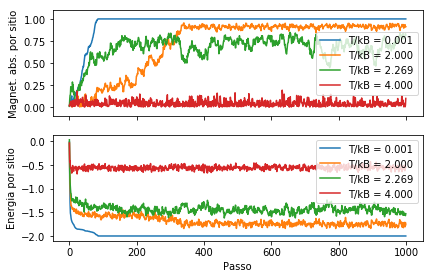

In [81]:
L = 40 # largura do grid de spins
J = 1 # constante de interacao entre os spins
h = 0 # constante de interacao do spin com o campo magnetico externo
TC = 2*J/np.log(1 + np.sqrt(2))
vecT = [0.001, 2, TC, 4]
Nsteps = 1000

fig, axes = plt.subplots(nrows = 2, sharex = True)
axes[0].set_ylabel('Magnet. abs. por sitio')
axes[0].set_ylim(-0.1, 1.1)
axes[1].set_xlabel('Passo')
axes[1].set_ylabel('Energia por sitio')

for T in vecT:
    m = np.zeros(Nsteps)
    e = np.zeros(Nsteps)

    steps = [choice([-1, +1], (L, L))]
    for k in range(Nsteps):
        steps.append(ising_step(steps[-1].copy(), T, J, h))
        m[k] = magnetization_per_site(steps[k])
        e[k] = energy_per_site(steps[k], J, h)

    axes[0].plot(np.abs(m), label = 'T/kB = {:.3f}'.format(T))
    axes[1].plot(e, label = 'T/kB = {:.3f}'.format(T))

axes[0].legend(loc = 'best')
axes[1].legend(loc = 'best')
plt.tight_layout()
plt.show()

## Graficos da evolucao da magnetizacao e da energia em funcao da temperatura

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in sinh
  app.launch_new_instance()


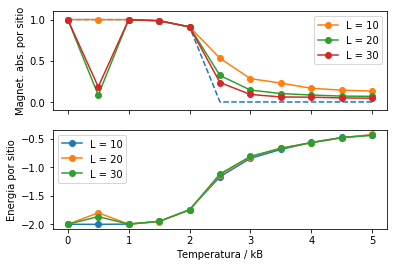

In [87]:
J = 1 # constante de interacao entre os spins
h = 0 # constante de interacao do spin com o campo magnetico externo
TC = 2*J/np.log(1 + np.sqrt(2))
Tmin = 1e-17 # temperatura proxima de zero
Tmax = 5
DeltaT = 0.5
T = np.arange(Tmin, Tmax + DeltaT, DeltaT)
NT = len(T)
vecL = [10, 20, 30] # tamanho do array de spins
Nsteps = 1000
ntransient = 500

mexact = np.zeros(NT)
for k in range(NT):
    if T[k] < TC:
        mexact[k] = (1 - np.sinh(2*J/T[k])**(-4))**(1/8)

fig, axes = plt.subplots(nrows = 2, sharex = True)
axes[0].set_ylabel('Magnet. abs. por sitio')
axes[0].set_ylim(-0.1, 1.1)
axes[1].set_xlabel('Temperatura / kB')
axes[1].set_ylabel('Energia por sitio')

axes[0].plot(T, mexact, '--')

for L in vecL:
    m = np.zeros(NT)
    e = np.zeros(NT)

    for k in range(NT):
        thism = np.zeros(Nsteps)
        thise = np.zeros(Nsteps)

        images = [choice([-1, +1], (L, L))]
        for n in range(Nsteps):
            images.append(ising_step(images[-1].copy(), T[k], J, h))
            thism[n] = magnetization_per_site(images[n])
            thise[n] = energy_per_site(images[n], J, h)

            m[k] = np.mean(np.abs(thism[ntransient:]))
            e[k] = np.mean(thise[ntransient:])

    axes[0].plot(T, m, '-o', label = 'L = {:d}'.format(L))
    axes[1].plot(T, e, '-o', label = 'L = {:d}'.format(L))
    
axes[0].legend(loc = 'best')
axes[1].legend(loc = 'best')
plt.show()